In [1]:
# https://www.aa.quae.nl/en/reken/zonpositie.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [3]:
# Anomalía media de la Tierra
M0 = 357.5291 * u.deg
M1 = 0.98560028 * u.deg / u.day

In [ ]:
C1 = 1.9148 * u.deg
C2 = 0.0200 * u.deg
C3 = 0.0003 * u.deg

In [8]:
peri = 102.9373 * u.deg

In [4]:
tm = np.arange(0, 366) * u.day

In [5]:
M = M0 + M1 * tm

In [6]:
C = C1 * np.sin(M) + C2 * np.sin(2*M) + C3 * np.sin(3*M)

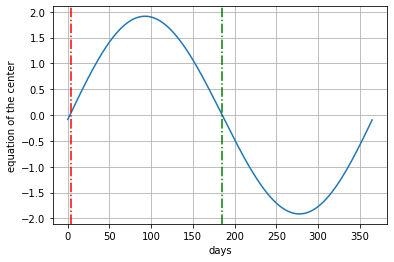

In [7]:
plt.plot(tm, C)
plt.ylabel("equation of the center")
plt.xlabel("days");
plt.axvline(4, color='r', ls='-.')
plt.axvline(185, color='g', ls='-.')
plt.grid()
plt.savefig('eq_of_center.png')

In [9]:
mean_l = M + peri
lon = mean_l + C
mean_l_sun = mean_l + 180 * u.deg
lon_sun = lon + + 180 * u.deg

In [10]:
eps = 23.4393 * u.deg

In [11]:
dec_sun = np.arcsin(np.sin(eps) * np.sin(lon_sun))
ra_sun = np.arctan2(np.cos(eps) * np.sin(lon_sun), np.cos(lon_sun))

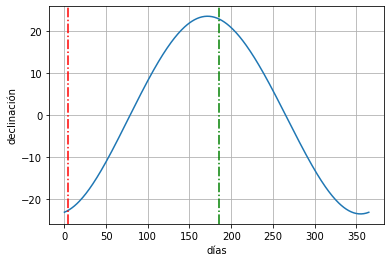

In [12]:
plt.plot(tm, dec_sun.to('deg'))
plt.grid()
plt.xlabel('días')
plt.ylabel('declinación')
plt.axvline(4, color='r', ls='-.')
plt.axvline(185, color='g', ls='-.')
plt.savefig('dec_calc.png')

In [13]:
ra_sun = ra_sun.to('deg') % (360 * u.deg)
lon_sun = lon_sun.to('deg') % (360 * u.deg)
S = ra_sun - lon_sun

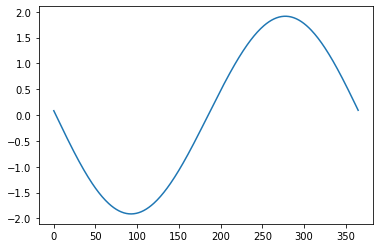

In [14]:
plt.plot(tm, -C)

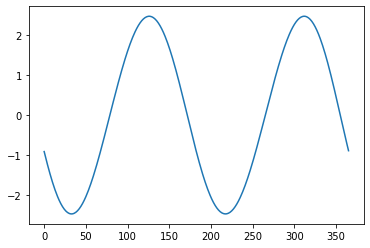

In [15]:
plt.plot(tm, -S)

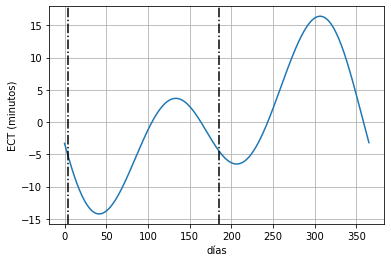

In [16]:
plt.plot(tm, -(C + S) / 360 * 24 * 60)
plt.grid()
plt.axvline(4, color='k', ls='-.')
plt.axvline(185, color='k', ls='-.')
plt.xlabel('días')
plt.ylabel('ECT (minutos)');
plt.savefig('eq_time.png')